In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
data_dir = r'D:\Personal Data\Data Science\Personal Project\Final Project Purwadhika - JKT Foodies One Stop Guide\5 - IMAGE CLASSIFIER\Zomato - Cuisine Type'
data_dir = pathlib.Path(data_dir)

In [3]:
category = ['Ayam', 'Bakmi', 'Bakso', 'Desserts', 'Kopi', 'Kue & Roti', 'Seafood', 'Snacks', 'Soto', 'Tea']

In [4]:
img_cat_count = []

for cat in category:
    img_count = len(list(data_dir.glob('{}/*.jpg'.format(cat))))
    print(f"Total Images for Category {cat}:", img_count)
    img_cat_count.append(img_count)

total_img = len(list(data_dir.glob('*/*.jpg')))
print(f"Total Training Images for All Category: {total_img}")

Total Images for Category Ayam: 1505
Total Images for Category Bakmi: 1474
Total Images for Category Bakso: 1554
Total Images for Category Desserts: 1523
Total Images for Category Kopi: 1495
Total Images for Category Kue & Roti: 1478
Total Images for Category Seafood: 1496
Total Images for Category Snacks: 1512
Total Images for Category Soto: 1485
Total Images for Category Tea: 1444
Total Training Images for All Category: 14966


In [5]:
img_df = pd.DataFrame({'Category': category, 'Image Count': img_cat_count})
img_df

,Category,Image Count
0,Ayam,1505
1,Bakmi,1474
2,Bakso,1554
3,Desserts,1523
4,Kopi,1495
5,Kue & Roti,1478
6,Seafood,1496
7,Snacks,1512
8,Soto,1485
9,Tea,1444


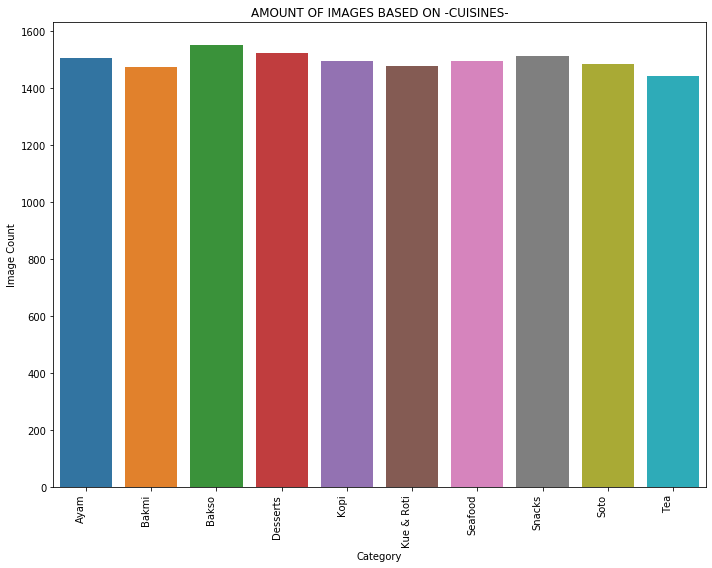

In [10]:
#Restaurant groupby city
plt.figure(figsize=(10,8))
ax = sns.barplot(x="Category", y='Image Count',data=img_df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.set_title('AMOUNT OF IMAGES BASED ON -CUISINES-')
plt.tight_layout()
plt.show()


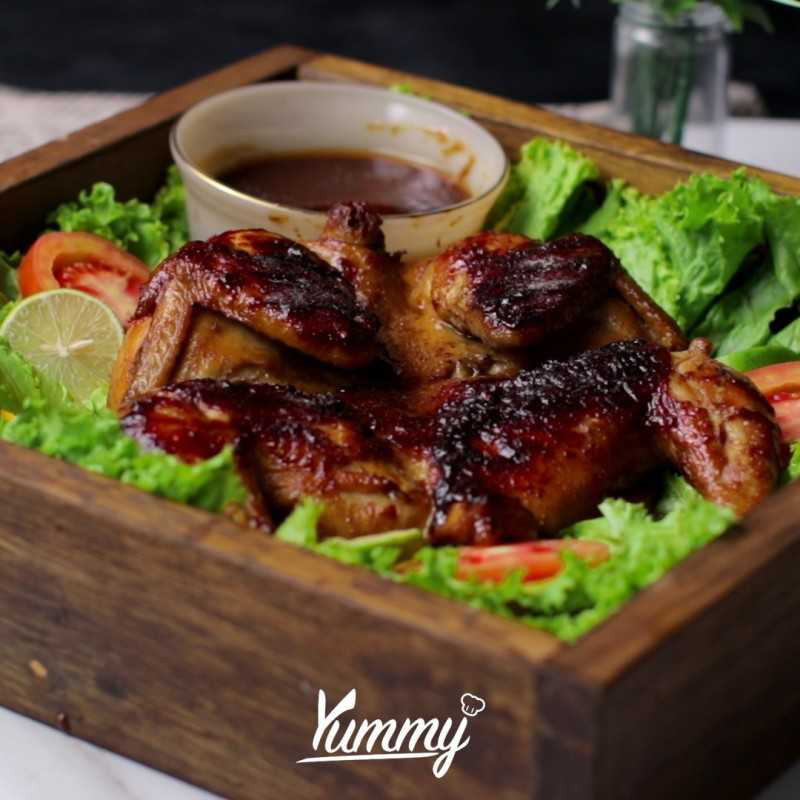

In [11]:
ayam = list(data_dir.glob('Ayam/*'))
PIL.Image.open(str(ayam[0]))

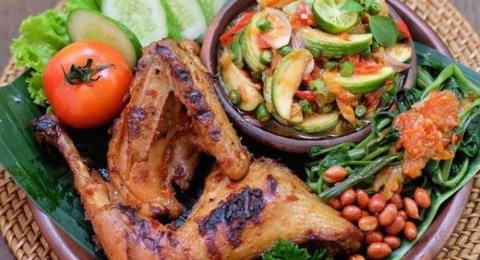

In [12]:
PIL.Image.open(str(ayam[1]))

In [13]:
batch_size = 32
img_height = 160
img_width = 160

In [18]:
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2) # set validation split

In [19]:
train_ds = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    seed = 123,
    subset='training') # set as training data

val_ds = train_datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    seed = 123,
    subset='validation') # set as validation data

Found 12814 images belonging to 10 classes.
Found 3200 images belonging to 10 classes.


In [20]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 160, 160, 3)
(32, 10)


In [21]:
num_classes = 10

model = Sequential([
  layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [22]:
# from tensorflow.keras.optimizers import SGD
# opt = SGD(lr=0.01)

model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 160, 160, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 80, 80, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 80, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        1

In [24]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose=1
)

Epoch 1/10
401/401 [==============================] - 956s 2s/step - loss: 8.1071 - accuracy: 0.0982 - val_loss: 8.1044 - val_accuracy: 0.0953
Epoch 2/10
401/401 [==============================] - 869s 2s/step - loss: 8.1006 - accuracy: 0.0953 - val_loss: 8.1044 - val_accuracy: 0.0953
Epoch 3/10
401/401 [==============================] - 853s 2s/step - loss: 8.1006 - accuracy: 0.0953 - val_loss: 8.1044 - val_accuracy: 0.0953
Epoch 4/10
401/401 [==============================] - 821s 2s/step - loss: 8.1006 - accuracy: 0.0953 - val_loss: 8.1044 - val_accuracy: 0.0953
Epoch 5/10
401/401 [==============================] - 809s 2s/step - loss: 8.1006 - accuracy: 0.0953 - val_loss: 8.1044 - val_accuracy: 0.0953
Epoch 6/10
401/401 [==============================] - 781s 2s/step - loss: 8.1006 - accuracy: 0.0953 - val_loss: 8.1044 - val_accuracy: 0.0953
Epoch 7/10
401/401 [==============================] - 805s 2s/step - loss: 8.1006 - accuracy: 0.0953 - val_loss: 8.1044 - val_accuracy: 0.0953

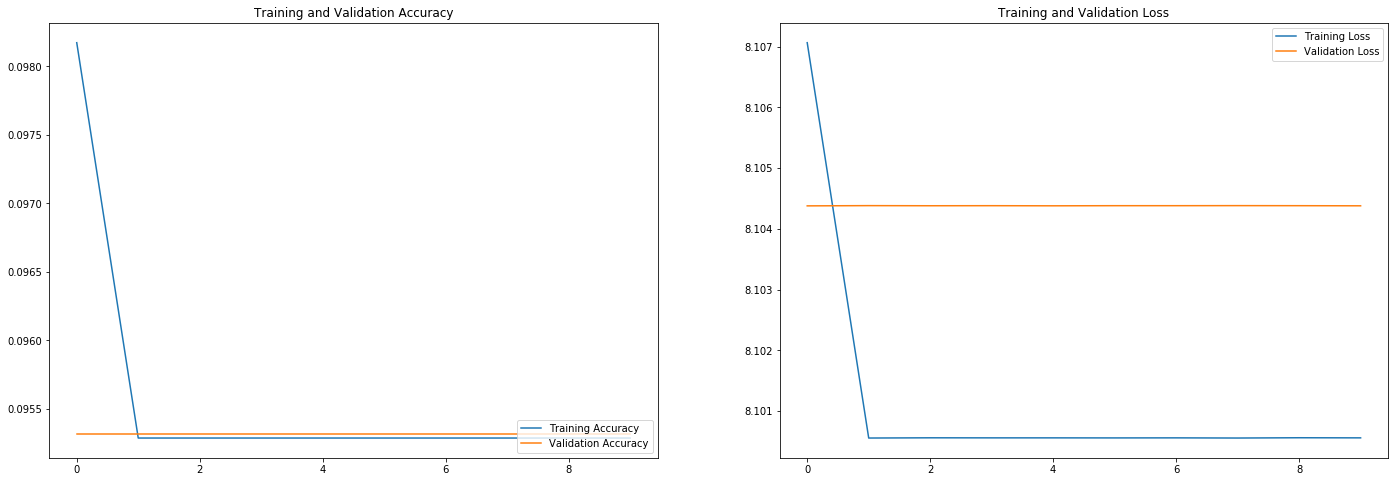

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=45,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.25) # set validation split

In [28]:
train_ds = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    seed = 123,
    subset='training') # set as training data

val_ds = train_datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    seed = 123,
    subset='validation') # set as validation data

Found 12014 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


In [29]:
num_classes = 10

model = Sequential([
  layers.Conv2D(64, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, (3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, (3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes, activation ='softmax')
])

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 158, 158, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 79, 79, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 77, 77, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 36, 36, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)      

In [33]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
376/376 [==============================] - 1055s 3s/step - loss: 2.2656 - accuracy: 0.1640 - val_loss: 2.2442 - val_accuracy: 0.1900
Epoch 2/10
376/376 [==============================] - 1046s 3s/step - loss: 2.2259 - accuracy: 0.2150 - val_loss: 2.2102 - val_accuracy: 0.2358
Epoch 3/10
376/376 [==============================] - 1042s 3s/step - loss: 2.2131 - accuracy: 0.2327 - val_loss: 2.1981 - val_accuracy: 0.2530
Epoch 4/10
376/376 [==============================] - 1039s 3s/step - loss: 2.1924 - accuracy: 0.2589 - val_loss: 2.1764 - val_accuracy: 0.2702
Epoch 5/10
376/376 [==============================] - 1081s 3s/step - loss: 2.1792 - accuracy: 0.2710 - val_loss: 2.1982 - val_accuracy: 0.2512
Epoch 6/10
376/376 [==============================] - 1088s 3s/step - loss: 2.1674 - accuracy: 0.2797 - val_loss: 2.1598 - val_accuracy: 0.2912
Epoch 7/10
376/376 [==============================] - 1072s 3s/step - loss: 2.1531 - accuracy: 0.2947 - val_loss: 2.1743 - val_accuracy:

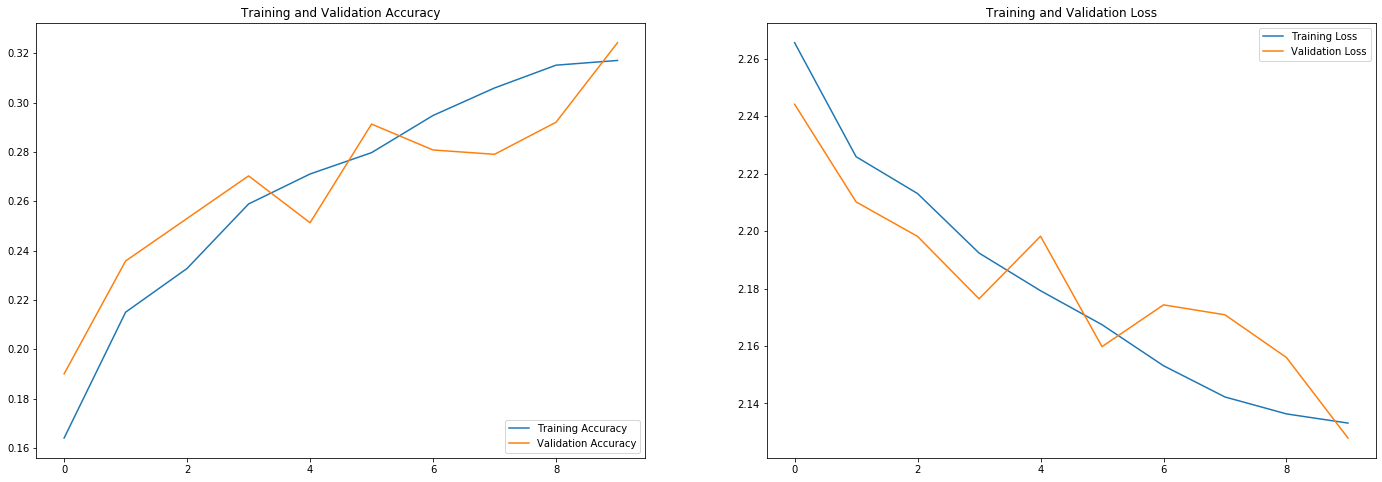

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
for i, layer in enumerate(model.layers):
   print(i, layer.name)

0 conv2d_4
1 max_pooling2d_4
2 conv2d_5
3 max_pooling2d_5
4 conv2d_6
5 max_pooling2d_6
6 conv2d_7
7 max_pooling2d_7
8 flatten_1
9 dropout
10 dense_2
11 dense_3


In [10]:
ayam = list(data_dir.glob('Ayam/*'))
ayamlst = list(ayam)

for i in ayamlst:
    PIL.Image.open(str(i))

In [13]:
bakmi = list(data_dir.glob('Bakmi/*'))
bakmilst = list(bakmi)

for i in bakmilst:
    PIL.Image.open(str(i))

In [41]:
bakso = list(data_dir.glob('Bakso/*'))
baksolst = list(bakso)

for i in baksolst:
    PIL.Image.open(str(i))

In [46]:
desserts = list(data_dir.glob('Desserts/*'))
dessertslst = list(desserts)

for i in dessertslst:
    PIL.Image.open(str(i))

In [32]:
kopi = list(data_dir.glob('Kopi/*'))
kopilst = list(kopi)

for i in kopilst:
    PIL.Image.open(str(i))

In [37]:
kue = list(data_dir.glob('Kue & Roti/*'))
kuelst = list(kue)

for i in kuelst:
    PIL.Image.open(str(i))

In [39]:
sea = list(data_dir.glob('Seafood/*'))
sealst = list(sea)

for i in sealst:
    PIL.Image.open(str(i))

In [52]:
snacks = list(data_dir.glob('Snacks/*'))
snackslst = list(snacks)

for i in snackslst:
    PIL.Image.open(str(i))

In [56]:
soto = list(data_dir.glob('Soto/*'))
sotolst = list(soto)

for i in sotolst:
    PIL.Image.open(str(i))

In [50]:
tea = list(data_dir.glob('Tea/*'))
tealst = list(tea)

for i in tealst:
    PIL.Image.open(str(i))